In [68]:
#!/usr/bin/python
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

import seaborn as sns
sns.set(style="whitegrid")


types = {
"Q1" : "tiny",
"Q2" : "sequential",
"Q3" : "sequential",
"Q4" : "broadcast",
"Q5" : "sequential",
"Q6" : "tiny",
"Q7" : "aggregate",
"Q8" : "complex",
"Q9" : "aggregate",
"Q10" : "sequential",
"Q11" : "broadcast",
"Q12" : "sequential",
"Q13" : "sequential",
"Q14" : "tiny",
"Q15" : "complex",
"Q16" : "aggregate",
"Q17" : "tiny",
"Q18" : "complex",
"Q19" : "complex",
"Q20" : "aggregate",
"Q21" : "complex",
"Q22" : "sequential",
}


df = pd.read_csv('/local0/papers/KARIZ/OSDI20/Figures/scripts/SimResultsTPCHWarmCache.csv')
def assign_type(row):
    
    dd = {"tiny": "small",
          "sequential": "large sequential",
          "broadcast": "tree-like",
          "aggregate": "aggregate",
          "complex": "complex"
         }
    
    row['type'] = dd[types[row['Query']]]
    return row

df = df.apply(assign_type, axis=1)

df['MRD'] = df['NoCache']/df['MRDp']
df['CP'] = df['NoCache']/df['CPp']
df['CMR'] = df['NoCache']/df['KARIZp']

df2 = df[['type', 'CMR', 'MRD', 'CP']]
df2

,type,CMR,MRD,CP
0,small,1.012563,1.012563,1.012563
1,small,1.012563,1.012563,1.012563
2,small,1.012563,1.012563,1.012563
3,small,1.995050,1.012563,1.012563
4,large sequential,1.670623,1.501333,1.501333
5,large sequential,1.000000,1.000000,1.000000
6,tree-like,1.000000,1.000000,1.000000
7,large sequential,1.181159,1.181159,1.181159
8,small,1.000000,1.000000,1.000000
9,aggregate,1.048452,1.000000,1.048452


In [69]:
df3 = pd.melt(df2, id_vars=['type'], value_vars=['MRD', 'CP', 'CMR'],
              var_name='alg', value_name='improvement')

df3

,type,alg,improvement
0,small,MRD,1.012563
1,small,MRD,1.012563
2,small,MRD,1.012563
3,small,MRD,1.012563
4,large sequential,MRD,1.501333
5,large sequential,MRD,1.000000
6,tree-like,MRD,1.000000
7,large sequential,MRD,1.181159
8,small,MRD,1.000000
9,aggregate,MRD,1.000000


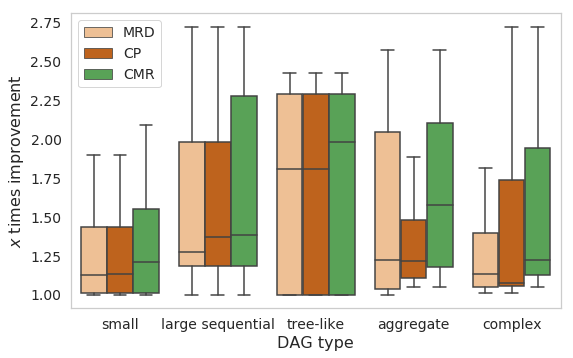

In [70]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
import math


colors=['#fdc086', '#d95f02', '#4daf4a']
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="type", y="improvement", hue='alg', data=df3,ax=ax, palette=colors, showfliers=False)

plt.ylabel(r'$x$ times improvement', fontsize=16)
plt.xlabel('DAG type', fontsize=16)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks2))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_yticks2))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.grid(False)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])

#new_labels = ['MRD', 'CP', 'CMR']
#for t, l in zip(plt._legend.texts, new_labels): t.set_text(l)

ax.legend(fontsize=14)


plt.subplots_adjust(left=0.13, bottom=0.17, right=0.98, top=0.99)
fig.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_runtimecomparisoncdfwarm.pdf', format='pdf', dpi=200)
fig.savefig('/local0/papers/KARIZ/OSDI20/Figures/fig_runtimecomparisoncdfwarm.png', format='png', dpi=200)

plt.show()
                     
